# Wealth effect on PISA Scores
## by Simón Muñoz

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [38]:
df_pisa_small = pd.read_csv('pisa2012_small.csv', low_memory=False)

In [39]:
# Let´s prepare to do some cleaning
df_clean = df_pisa_small.copy()

In [40]:
# Let´s get rid of rows with null values
df_clean = df_clean.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185626 entries, 22151 to 475552
Data columns (total 12 columns):
birth_-_month                          185626 non-null int64
gender                                 185626 non-null object
how_many_books_at_home                 185626 non-null object
at_school_-_desktop_computer           185626 non-null object
at_school_-_portable_laptop            185626 non-null object
age_of_student                         185626 non-null float64
out-of-school_study_time_-_homework    185626 non-null float64
possessions_-_computer                 185626 non-null object
wealth                                 185626 non-null float64
math_score                             185626 non-null float64
reading_score                          185626 non-null float64
science_score                          185626 non-null float64
dtypes: float64(6), int64(1), object(5)
memory usage: 18.4+ MB


In [42]:
# Let´s change the type to the columns that hold categorical data
categorical_data = ['gender', 
                    'how_many_books_at_home', 
                    'at_school_-_desktop_computer', 
                    'at_school_-_portable_laptop',
                    'possessions_-_computer']

for cat in categorical_data:
    df_clean[cat] = df_clean[cat].astype('category')
    
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185626 entries, 22151 to 475552
Data columns (total 12 columns):
birth_-_month                          185626 non-null int64
gender                                 185626 non-null category
how_many_books_at_home                 185626 non-null category
at_school_-_desktop_computer           185626 non-null category
at_school_-_portable_laptop            185626 non-null category
age_of_student                         185626 non-null float64
out-of-school_study_time_-_homework    185626 non-null float64
possessions_-_computer                 185626 non-null category
wealth                                 185626 non-null float64
math_score                             185626 non-null float64
reading_score                          185626 non-null float64
science_score                          185626 non-null float64
dtypes: category(5), float64(6), int64(1)
memory usage: 12.2 MB


## Do wealthy students do better at PISA?

The Programme for International Student Assessment (PISA) is a worldwide study by the Organisation for Economic Co-operation and Development (OECD) in member and non-member nations intended to evaluate educational systems by measuring 15-year-old school pupils' scholastic performance on mathematics, science, and reading. 

Along the following slides, we are going to observe the influence (if any) that different wealth levels in students have in their PISA Scores.

In [6]:
import seaborn as sns
sns.set_style("white")
sns.despine()

# Function that we will use during the exercise to decorate our charts",
def decorate(title, xlabel, ylabel, xticks=None, xticklabels=None, yticks=None, yticklabels=None):
    ax.set_title(title, fontsize=22)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xticks is not None:
        ax.set_xticks(xticks)
    if xticklabels is not None:
        ax.set_xticklabels(xticklabels, rotation=70)
    if yticks is not None:
            ax.set_xticks(yticks)
    if yticklabels is not None:
        ax.set_xticklabels(yticklabels, rotation=70)
#    fig.tight_layout()

# Function that we will use during the exercise to decorate our charts",
def decorate_subplot(subplot, title, xlabel, ylabel, xticks=None, xticklabels=None, yticks=None, yticklabels=None):
    subplot.set_title(title, fontsize=14)
    subplot.set_xlabel(xlabel)
    subplot.set_ylabel(ylabel)
    if xticks is not None:
        subplot.set_xticks(xticks)
    if xticklabels is not None:
        subplot.set_xticklabels(xticklabels, rotation=70)
    if yticks is not None:
            subplot.set_xticks(yticks)
    if yticklabels is not None:
        subplot.set_xticklabels(yticklabels, rotation=70)
    subplot.grid(alpha=1)
#    fig.tight_layout()

<Figure size 432x288 with 0 Axes>

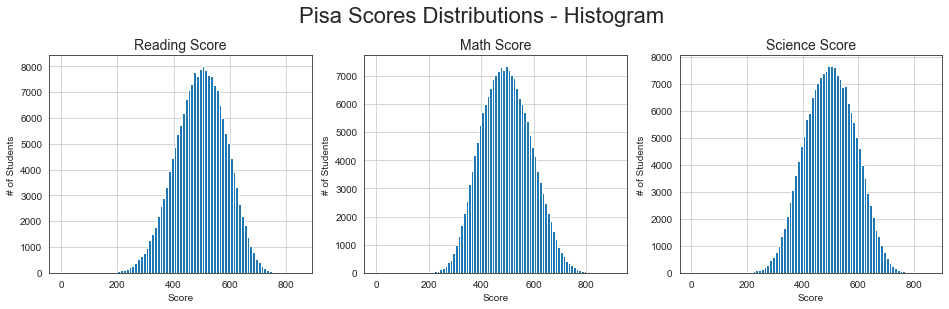

In [7]:
# Histograms for pisa scores

plt.figure(figsize=(16,4))
plt.suptitle('PISA Scores Distributions - Histogram', fontsize=22, y='1.05')

# First subplot
ax1 = plt.subplot(1, 3, 1) # 1 row, 3 cols, subplot 1
bin_edges = np.arange(0, df_clean['reading_score'].max()+10, 10)
plt.hist(data = df_clean, x = 'reading_score', bins = bin_edges);
decorate_subplot(ax1, "Reading Score", "Score", "# of Students")

# Second subplot
ax2 = plt.subplot(1, 3, 2)
bin_edges = np.arange(0, df_clean['math_score'].max()+10, 10)
plt.hist(data = df_clean, x = 'math_score', bins = bin_edges);
decorate_subplot(ax2, "Math Score", "Score", "# of Students")

# Third subplot
ax3 = plt.subplot(1, 3, 3)
bin_edges = np.arange(0, df_clean['science_score'].max()+10, 10)
plt.hist(data = df_clean, x = 'science_score', bins = bin_edges);
decorate_subplot(ax3, "Science Score", "Score", "# of Students")

plt.show()

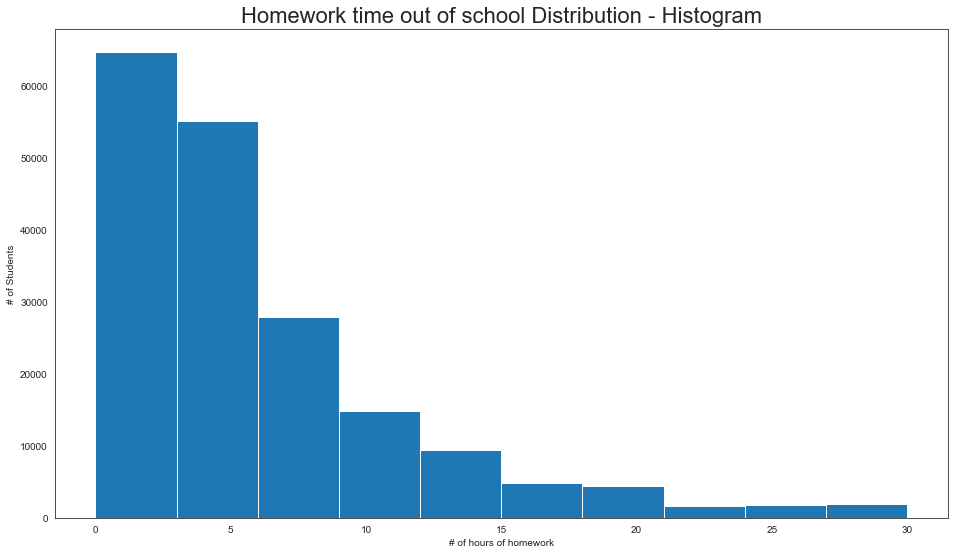

In [8]:
# Histogram for time of homework
fig, ax = plt.subplots(figsize=(16,9))
ax.hist(data = df_clean, x = 'out-of-school_study_time_-_homework')
decorate("Homework time out of school Distribution - Histogram", "# of hours of homework", "# of Students")
plt.show();

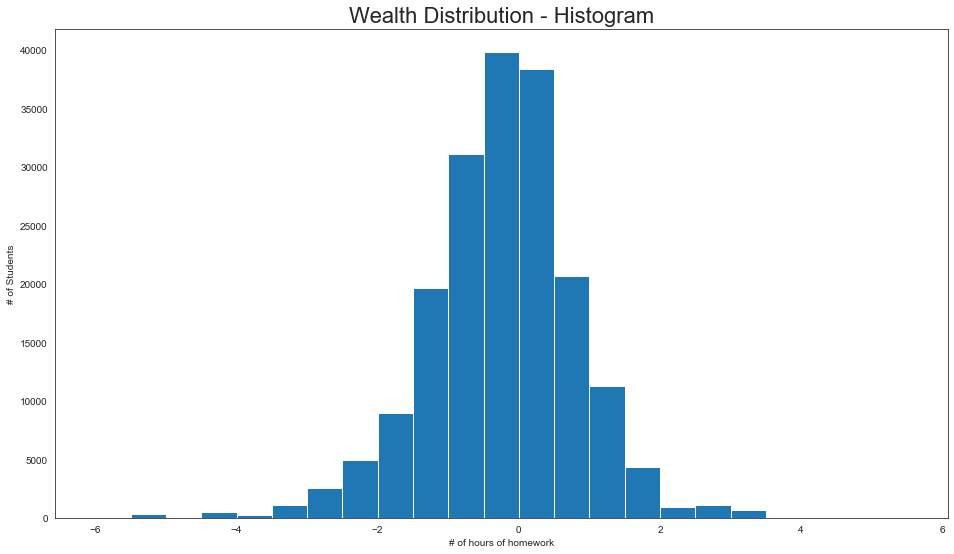

In [9]:
# Histogram for wealth
bin_edges = np.arange(-6, 6, 0.5)
fig, ax = plt.subplots(figsize=(16,9))
ax.hist(data = df_clean, x = 'wealth', bins=bin_edges)
decorate("Wealth Distribution - Histogram", "# of hours of homework", "# of Students")
plt.show();

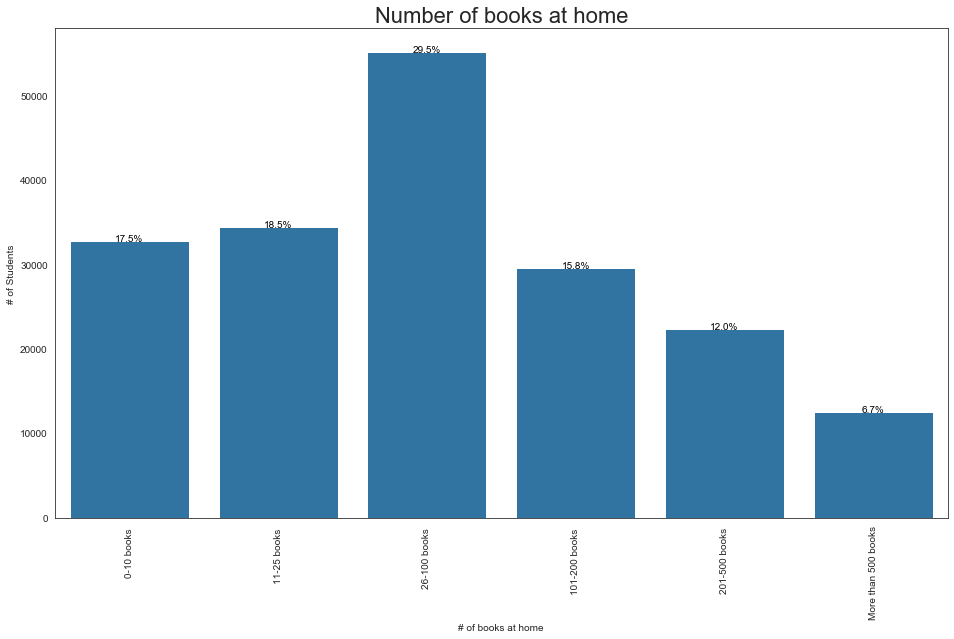

In [10]:
base_color = sb.color_palette()[0]
books_order = ["0-10 books ", "11-25 books ", "26-100 books ", "101-200 books ", "201-500 books ", "More than 500 books"]

# Plot
fig = plt.subplots(figsize=(16,9))
ax = sb.countplot(data=df_clean, 
             x='how_many_books_at_home', 
             color=base_color, 
             order=books_order);
decorate("Number of books at home", "# of books at home", "# of Students")
plt.xticks(rotation=90)

# Add function to add annotations
def add_percentage_annotations(df, column):
    n_points = df.shape[0]
    cat_counts = df[column].value_counts()
    locs, labels = plt.xticks() # get the current tick locations and labels

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = cat_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_points)

        # print the annotation just below the top of the bar
        plt.text(loc, count-8, pct_string, ha = 'center', color = '0')
        
add_percentage_annotations(df_clean, 'how_many_books_at_home')

In [44]:
# Let´s create a sample of our data to ease the calculation time for our charts and reduce the number of datapoints
df_sample = df_clean.sample(1000)

## Our data indicates that wealthy students obtain better Pisa scores

First of all, the analysis of our data confirms that wealthy students get better scores in the three disciplines PISA measures, reading, maths and sciences.

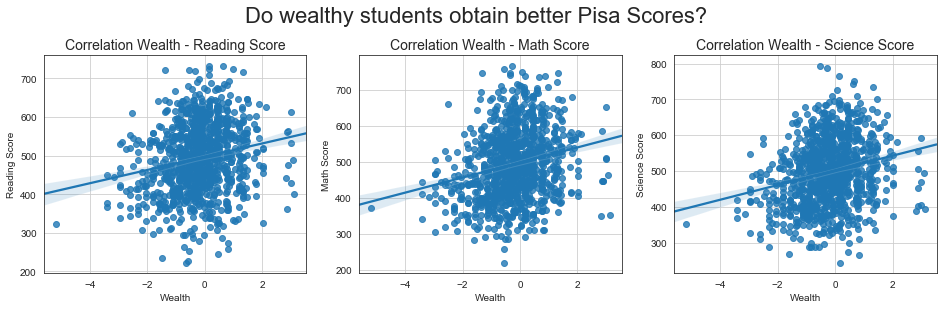

In [12]:
# Let´s plot the correlation between wealth and the pisa scores
plt.figure(figsize = [16,4])
plt.suptitle('Do wealthy students obtain better Pisa Scores?', fontsize=22, y='1.05')

ax1 = plt.subplot(1, 3, 1) # 1 row, 3 cols, subplot 1
sb.regplot(data = df_sample, x = 'wealth', y = 'reading_score');
decorate_subplot(ax1, "Correlation Wealth - Reading Score", "Wealth", "Reading Score")

ax2 = plt.subplot(1, 3, 2) 
sb.regplot(data = df_sample, x = 'wealth', y = 'math_score');
decorate_subplot(ax2, "Correlation Wealth - Math Score", "Wealth", "Math Score")

ax3 = plt.subplot(1, 3, 3) 
sb.regplot(data = df_sample, x = 'wealth', y = 'science_score');
decorate_subplot(ax3, "Correlation Wealth - Science Score", "Wealth", "Science Score")

## But wealthy students don't do more homework than non-wealthy ones

One of the insights extracted from the data is that study time out of class like homework, has a positive impact on the PISA scores of the students. Could wealthy students have more time available for this task? 

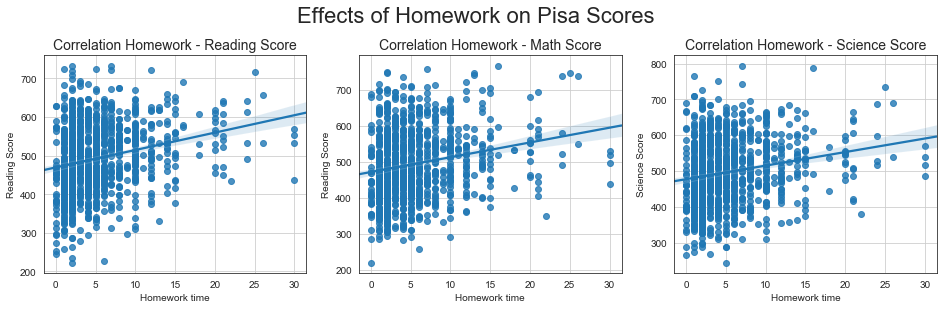

In [28]:
# Let´s plot the correlation between the scores and the homework time
plt.figure(figsize = [16,4])
plt.suptitle('Effects of Homework on Pisa Scores', fontsize=22, y='1.05')

ax1 = plt.subplot(1, 3, 1)
sb.regplot(data = df_sample, x = 'out-of-school_study_time_-_homework', y = 'reading_score');
decorate_subplot(ax1, "Correlation Homework - Reading Score", "Homework time", "Reading Score")

ax2 = plt.subplot(1, 3, 2)
sb.regplot(data = df_sample, x = 'out-of-school_study_time_-_homework', y = 'math_score');
decorate_subplot(ax2, "Correlation Homework - Math Score", "Homework time", "Reading Score")

ax3 = plt.subplot(1, 3, 3)
sb.regplot(data = df_sample, x = 'out-of-school_study_time_-_homework', y = 'science_score');
decorate_subplot(ax3, "Correlation Homework - Science Score", "Homework time", "Science Score")



However, this doesn´t seem to be the cause of the wealthy students obtaining better scores, as the data indicates that wealthy students do not dedicate more time to study than non wealty ones.

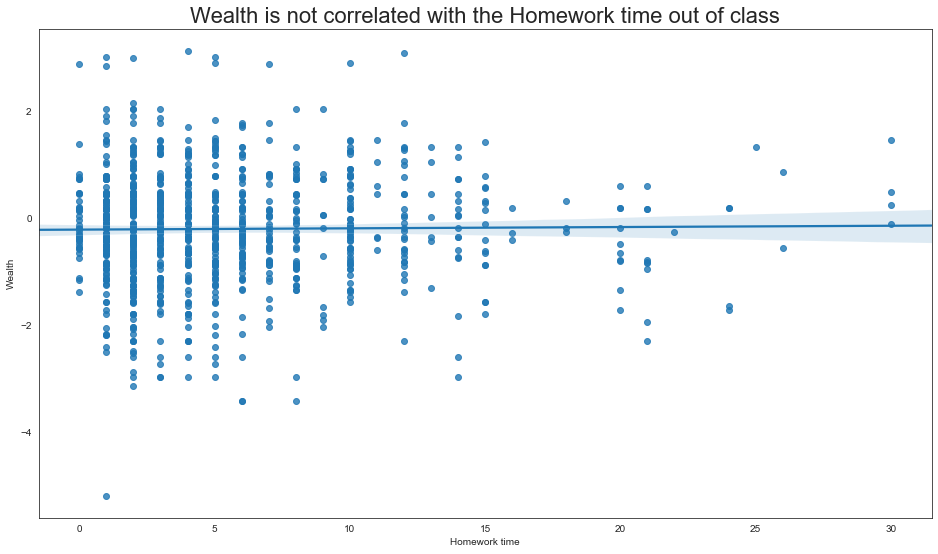

In [29]:
# Let´s plot the correlation between wealth and study time out of school

# Plot the birth month variable
fig = plt.subplots(figsize=(16,9))
ax = sb.regplot(data = df_sample, x = 'out-of-school_study_time_-_homework', y = 'wealth');
decorate("Wealth is not correlated with the Homework time out of class", "Homework time", "Wealth")

## Wealthy students tend to have more books at home than non-wealthy ones

Observing the data, we can attest that one of the factors that influence positively the different PISA Scores is the number of books per households.

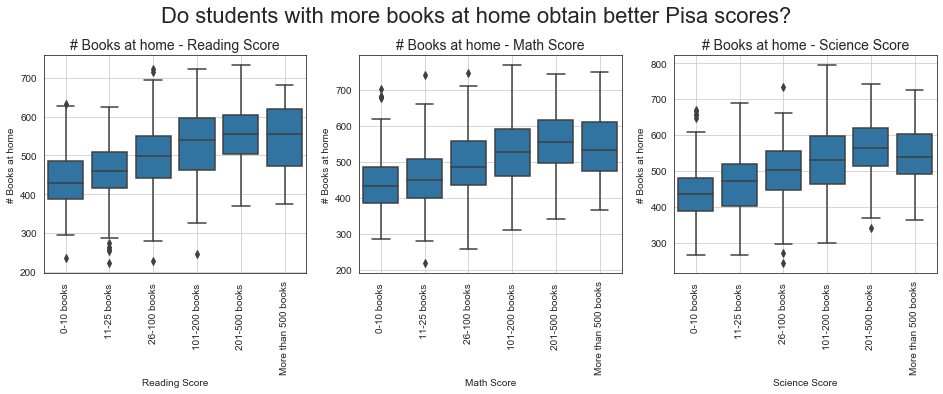

In [26]:
# Boxplots relationing books at home - pisa scores
books_cat_order = ["0-10 books ", "11-25 books ", "26-100 books ", "101-200 books ", "201-500 books ", "More than 500 books"]
plt.figure(figsize = [16,4])
plt.suptitle('Do students with more books at home obtain better Pisa scores?', fontsize=22, y='1.05')

ax1 = plt.subplot(1, 3, 1) 
sb.boxplot(data = df_sample, x = 'how_many_books_at_home', y = 'reading_score', 
    color = base_color, order=books_cat_order);
decorate_subplot(ax1, "# Books at home - Reading Score", "Reading Score", "# Books at home");
plt.xticks(rotation=90);

ax2 = plt.subplot(1, 3, 2) 
sb.boxplot(data = df_sample, x = 'how_many_books_at_home', y = 'math_score', 
              color = base_color, order=books_cat_order);
decorate_subplot(ax2, "# Books at home - Math Score", "Math Score", "# Books at home");
plt.xticks(rotation=90);

ax3 = plt.subplot(1, 3, 3) 
sb.boxplot(data = df_sample, x = 'how_many_books_at_home', y = 'science_score', 
              color = base_color, order=books_cat_order);
decorate_subplot(ax3, "# Books at home - Science Score", "Science Score", "# Books at home");
plt.xticks(rotation=90);

And in fact, **wealthy students tend to have more books at home** than non-wealthy ones, so this could be one of the causes of the advantage for these students.

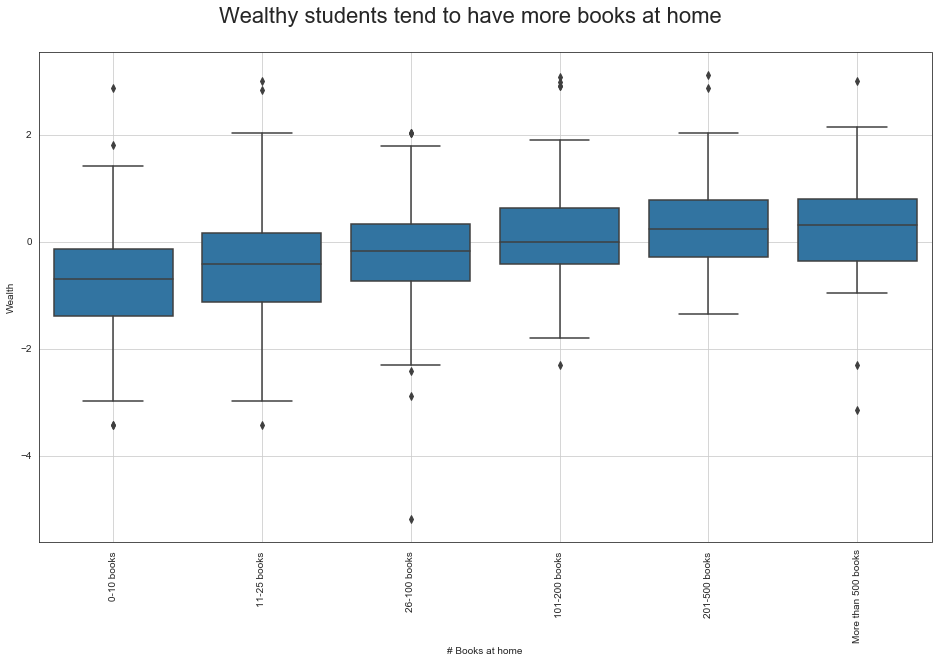

In [31]:
# Boxplots relationing books at home - pisa scores
books_cat_order = ["0-10 books ", "11-25 books ", "26-100 books ", "101-200 books ", "201-500 books ", "More than 500 books"]
plt.figure(figsize = [16,9])
plt.suptitle('Wealthy students tend to have more books at home', fontsize=22, y=.95)

ax = sb.boxplot(data = df_sample, x = 'how_many_books_at_home', y = 'wealth', 
    color = base_color, order=books_cat_order);
decorate_subplot(ax, "", "# Books at home", "Wealth");
plt.xticks(rotation=90);

## Wealthy students also have more chances to own a computer

Another factor influencing positively PISA scores has been the possession of a computer. 

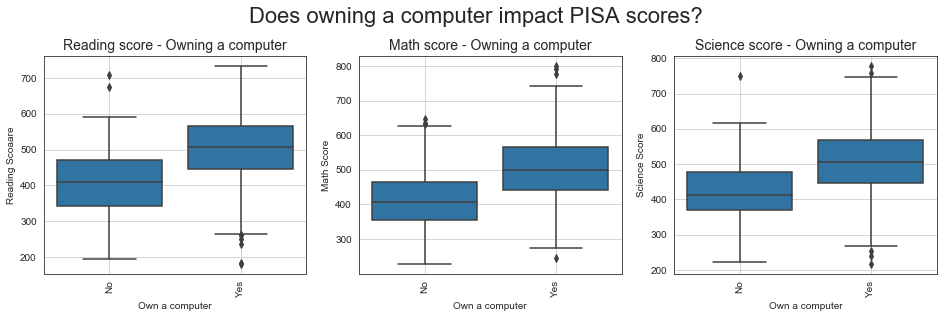

In [45]:
# Boxplots relationing owning a computer and PISA scores
plt.figure(figsize = [16,4])
plt.suptitle('Does owning a computer impact PISA scores?', fontsize=22, y='1.05')

ax1 = plt.subplot(1, 3, 1) 
sb.boxplot(data = df_sample, x = 'possessions_-_computer', y = 'reading_score', color = base_color)
decorate_subplot(ax1, "Reading score - Owning a computer", "Own a computer", "Reading Scoaare")
plt.xticks(rotation=90);

ax2 = plt.subplot(1, 3, 2) 
sb.boxplot(data = df_sample, x = 'possessions_-_computer', y = 'math_score', color = base_color)
decorate_subplot(ax2, "Math score - Owning a computer", "Own a computer", "Math Score")
plt.xticks(rotation=90);

ax3 = plt.subplot(1, 3, 3) 
sb.boxplot(data = df_sample, x = 'possessions_-_computer', y = 'science_score', color = base_color)
decorate_subplot(ax3, "Science score - Owning a computer", "Own a computer", "Science Score")
plt.xticks(rotation=90);

And this is another of the advantages that wealthy students have over non-wealthy ones.

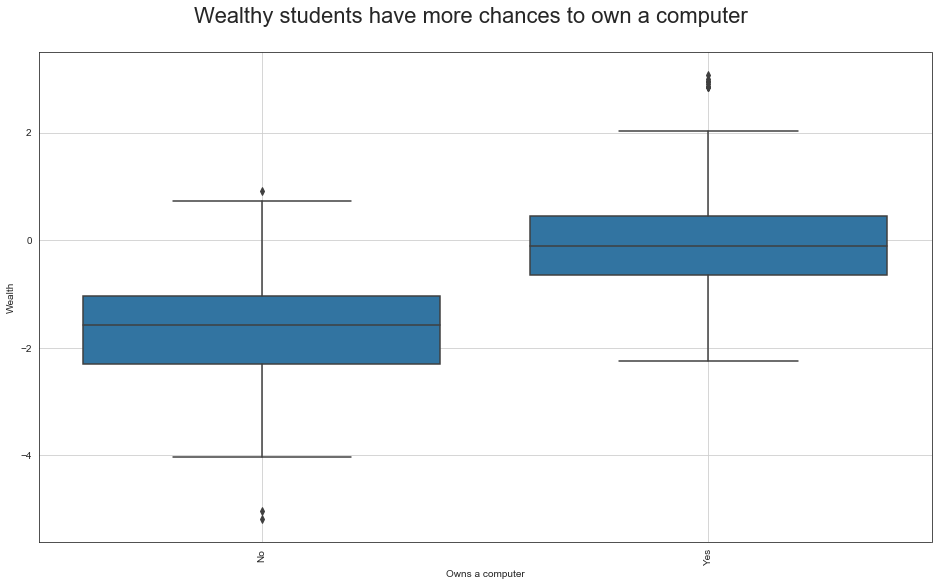

In [47]:
# Boxplots relationing books at home - pisa scores
plt.figure(figsize = [16,9])
plt.suptitle('Wealthy students have more chances to own a computer', fontsize=22, y=.95)

ax = sb.boxplot(data = df_sample, x = 'possessions_-_computer', y = 'wealth', 
    color = base_color);
decorate_subplot(ax, "", "Owns a computer", "Wealth");
plt.xticks(rotation=90);

In [67]:
# Let´s create an average of the pisa scores
df_clean['pisa_score_average'] = (df_clean['reading_score'] + df_clean['math_score'] + df_clean['science_score'])/3
df_clean.head(1)

,birth_-_month,gender,how_many_books_at_home,at_school_-_desktop_computer,at_school_-_portable_laptop,age_of_student,out-of-school_study_time_-_homework,possessions_-_computer,wealth,math_score,reading_score,science_score,pisa_score_average
22151,11,Female,201-500 books,"Yes, but I dont use it","Yes, and I use it",15.75,5.0,Yes,1.46,562.63438,582.47156,581.81648,575.640807


## Having access to more resources seem to improve your PISA scores

We´ve seen that having books at home and owning a computer increases your PISA scores. What we haven´t seen until now is that students having access to both resources are the ones who get the better scores.

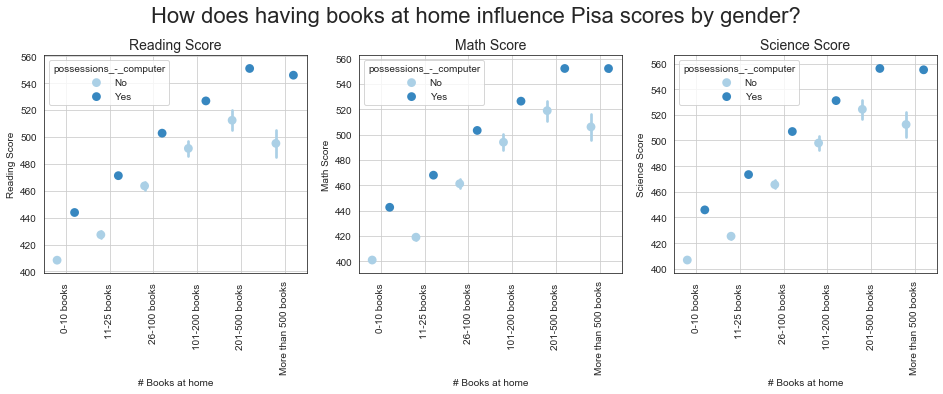

In [73]:
# Relationship between 2 categorical and 1 numerical variable
fig = plt.figure(figsize = [16,4])
plt.suptitle('Students with both a high number of books at home and a computer obtain the better scores', fontsize=22, y='1.05')

plt.subplot(1, 3, 1) 
ax1 = sb.pointplot(data = df_clean, x = 'how_many_books_at_home', y = 'reading_score', hue = 'possessions_-_computer',
           palette = 'Blues', linestyles = '', dodge = 0.4, order=books_cat_order);
decorate_subplot(ax1, "Reading Score", "# Books at home", "Reading Score");
plt.xticks(rotation=90);

plt.subplot(1, 3, 2) 
ax2 = sb.pointplot(data = df_clean, x = 'how_many_books_at_home', y = 'math_score', hue = 'possessions_-_computer',
           palette = 'Blues', linestyles = '', dodge = 0.4, order=books_cat_order);
decorate_subplot(ax2, "Math Score", "# Books at home", "Math Score");
plt.xticks(rotation=90);

plt.subplot(1, 3, 3) 
ax3 = sb.pointplot(data = df_clean, x = 'how_many_books_at_home', y = 'science_score', hue = 'possessions_-_computer',
           palette = 'Blues', linestyles = '', dodge = 0.4, order=books_cat_order);
decorate_subplot(ax3, "Science Score", "# Books at home", "Science Score");
plt.xticks(rotation=90);

## Conclusions

* Wealth level of students has a clear positive effect on their PISA scores
* Wealthy students do not study out of class more than non wealthy ones
* Students with more books at home tend to obtain better scores. 
* Also, owning a computer seems to be positively correlated with getting better scores.
* Wealthy students have greater chances of having more books at home and owning a computer. 
* Students with a high number of books at home and who own a computer are ones getting the higher scores.

Given our analysis, we can conclude that apparently, wealth levels are an important factor in the academic performance of students.

## Wealth is evenly distributed between genres

The data shows that wealth in our dataset is evenly distributed among genres. This is one important check to discard that one genre could be in disadvantage over the other.

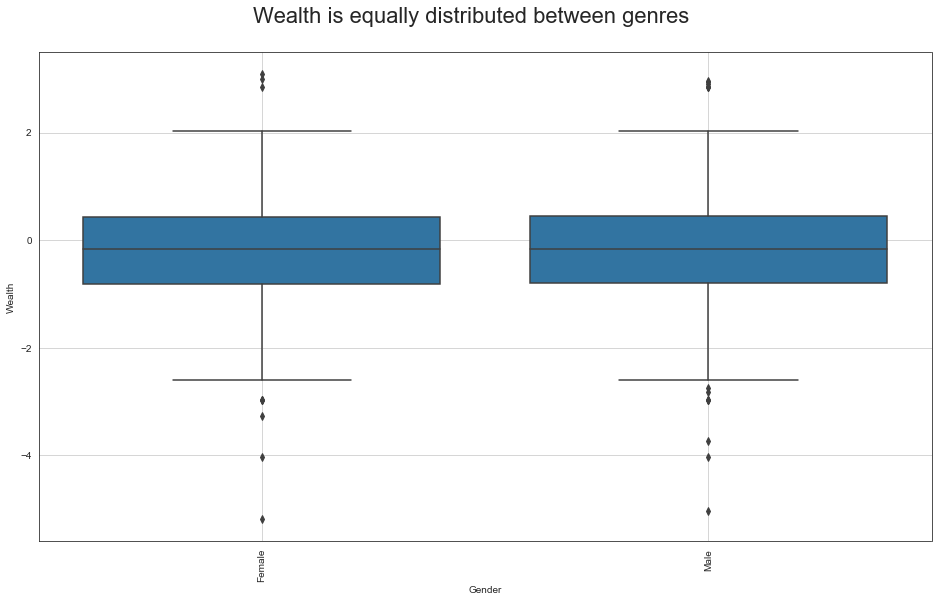

In [58]:
# Boxplots relationing gender with wealth
plt.figure(figsize = [16,9])
plt.suptitle('Wealth is equally distributed between genres', fontsize=22, y='0.95')

ax1 = sb.boxplot(data = df_sample, x = 'gender', y = 'wealth', color = base_color)
decorate_subplot(ax1, "", "Gender", "Wealth");
plt.xticks(rotation=90);

In [ ]:
g = sb.FacetGrid(data = df_clean.sample(1000), col = 'gender', size = 4)
g.map(sb.boxplot, 'how_many_books_at_home', 'math_score', order=books_order)
plt.xticks(rotation=90)

In [ ]:
g = sb.FacetGrid(data = df_clean.sample(5000), row = 'gender', col = 'how_many_books_at_home', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'math_score', 'reading_score')

In [ ]:
fig = plt.figure(figsize = [16,4])

plt.subplot(1, 3, 1) 
ax = sb.pointplot(data = df_sample, x = 'out-of-school_study_time_-_homework', y = 'reading_score', hue = 'gender',
           palette = 'Blues', linestyles = '', dodge = 0.4)
ax.set_yticklabels([],minor = True)
plt.xticks(rotation=90)

plt.subplot(1, 3, 2) 
ax = sb.pointplot(data = df_sample, x = 'out-of-school_study_time_-_homework', y = 'math_score', hue = 'gender',
           palette = 'Blues', linestyles = '', dodge = 0.4)
ax.set_yticklabels([],minor = True)
plt.xticks(rotation=90)

plt.subplot(1, 3, 3) 
ax = sb.pointplot(data = df_sample, x = 'out-of-school_study_time_-_homework', y = 'science_score', hue = 'gender',
           palette = 'Blues', linestyles = '', dodge = 0.4)
ax.set_yticklabels([],minor = True)
plt.xticks(rotation=90)

plt.show();

In [ ]:
# Boxplots relationing gender at home math_score
plt.figure(figsize = [16,4])

plt.subplot(1, 3, 1) 
df_sample=df_pisa_small.sample(20000)
plt.scatter(data=df_sample, x='out-of-school_study_time_-_homework', c='reading_score', y='wealth')
plt.legend()

plt.subplot(1, 3, 2) 
df_sample=df_pisa_small.sample(20000)
plt.scatter(data=df_sample, x='out-of-school_study_time_-_homework', c='math_score', y='wealth')
plt.legend()

plt.subplot(1, 3, 3) 
df_sample=df_pisa_small.sample(20000)
plt.scatter(data=df_sample, x='out-of-school_study_time_-_homework', c='science_score', y='wealth')
plt.legend()

In [ ]:
g = sb.FacetGrid(data = df_clean, col = 'gender', size = 4)
g.map(sb.boxplot, 'at_school_-_desktop_computer', 'math_score')


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!